 # Text featurization ( part 2)
 
 ##### converting text to vector
    

In [0]:
#import all the necessary packages.

from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from bs4 import BeautifulSoup
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import math
import time
import re
import os
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity  
from sklearn.metrics import pairwise_distances
from matplotlib import gridspec
from scipy.sparse import hstack
import plotly
import plotly.figure_factory as ff
from plotly.graph_objs import Scatter, Layout

from IPython.display import Image, display

plotly.offline.init_notebook_mode(connected=True)
warnings.filterwarnings("ignore")

In [0]:
# For multi gpu system. Specify GPU device.

import os

os.environ["CUDA_VISIBLE_DEVICES"]="1"
import tensorflow as tf
import keras
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
keras.backend.set_session(sess)

Using TensorFlow backend.


In [0]:
data = pd.read_csv('datafile.csv')

In [0]:
data.iloc[0:2,0:20]

,productId,title,description,imageUrlStr,mrp,sellingPrice,specialPrice,productUrl,categories,productBrand,productFamily,inStock,codAvailable,offers,discount,shippingCharges,deliveryTime,size,color,sizeUnit
0,TOPE9ABBZU3HZRHN,Citrine Casual Short Sleeve Printed Women's Pi...,This beautiful printed modal top from Citrine ...,http://img.fkcdn.com/image/top/r/h/n/1-1-wwtpw...,1099,329.0,329.0,http://dl.flipkart.com/dl/citrine-casual-short...,"Apparels>Women>Western Wear>Shirts, Tops & Tun...",Citrine,"TOPE9ABBBTJYDSQE,TOPE9ABBHJ8HGGGK,TOPE9ABBPDAN...",False,True,NaN,70,0.0,NaN,S,"Pink, Off White",NaN
1,TOPE9ABBBTJYDSQE,Citrine Casual Short Sleeve Printed Women's Pi...,This beautiful printed modal top from Citrine ...,http://img.fkcdn.com/image/top/r/h/n/1-1-wwtpw...,1099,329.0,329.0,http://dl.flipkart.com/dl/citrine-casual-short...,"Apparels>Women>Western Wear>Shirts, Tops & Tun...",Citrine,"TOPE9ABBHJ8HGGGK,TOPE9ABBPDAN7VCH,TOPE9ABBZU3H...",False,True,NaN,70,0.0,NaN,M,"Pink, Off White",NaN


In [0]:
data.iloc[0:2,20:40]

,storage,displaySize,keySpecsStr,detailedSpecsStr,specificationList,sellerName,sellerAverageRating,sellerNoOfRatings,sellerNoOfReviews,sleeve,neck,idealFor,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39
0,NaN,NaN,"Round Neck, Short Sleeve;Fabric: Modal;Pattern...","Round Neck, Short Sleeve;Fabric: Modal;Pattern...",NaN,Shweta Mathur,3.4,11,0,Short Sleeve,Round Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,"Round Neck, Short Sleeve;Fabric: Modal;Pattern...","Round Neck, Short Sleeve;Fabric: Modal;Pattern...",NaN,Shweta Mathur,3.4,11,0,Short Sleeve,Round Neck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
print ('Number of data points : ', data.shape[0], \
       'Number of features/variables:', data.shape[1])

Number of data points :  346902 Number of features/variables: 53


In [0]:
data.columns 

Index(['productId', 'title', 'description', 'imageUrlStr', 'mrp',
       'sellingPrice', 'specialPrice', 'productUrl', 'categories',
       'productBrand', 'productFamily', 'inStock', 'codAvailable', 'offers',
       'discount', 'shippingCharges', 'deliveryTime', 'size', 'color',
       'sizeUnit', 'storage', 'displaySize', 'keySpecsStr', 'detailedSpecsStr',
       'specificationList', 'sellerName', 'sellerAverageRating',
       'sellerNoOfRatings', 'sellerNoOfReviews', 'sleeve', 'neck', 'idealFor',
       'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35',
       'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39',
       'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43',
       'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47',
       'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51',
       'Unnamed: 52'],
      dtype='object')

In [0]:
data.isnull().sum()

productId                   0
title                       5
description            131708
imageUrlStr                 0
mrp                         0
sellingPrice                1
specialPrice                1
productUrl                  0
categories                  0
productBrand                2
productFamily               1
inStock                     0
codAvailable                0
offers                 346902
discount                    0
shippingCharges             1
deliveryTime           173420
size                        0
color                     129
sizeUnit               344804
storage                346887
displaySize            346886
keySpecsStr              1008
detailedSpecsStr         1029
specificationList      346887
sellerName                  1
sellerAverageRating         0
sellerNoOfRatings           8
sellerNoOfReviews           6
sleeve                   1106
neck                     4953
idealFor               346892
Unnamed: 32            346887
Unnamed: 3

In [0]:
print(data['color'].describe())

count     346773
unique      6899
top        Black
freq       42571
Name: color, dtype: object


# selected the features that are important and has less or no missing values

In [0]:
dataf = data[['productId','title', 'imageUrlStr','mrp','categories','size','productBrand']]

In [0]:
dataf.head(2)

,productId,title,imageUrlStr,mrp,categories,size,productBrand
0,TOPE9ABBZU3HZRHN,Citrine Casual Short Sleeve Printed Women's Pi...,http://img.fkcdn.com/image/top/r/h/n/1-1-wwtpw...,1099,"Apparels>Women>Western Wear>Shirts, Tops & Tun...",S,Citrine
1,TOPE9ABBBTJYDSQE,Citrine Casual Short Sleeve Printed Women's Pi...,http://img.fkcdn.com/image/top/r/h/n/1-1-wwtpw...,1099,"Apparels>Women>Western Wear>Shirts, Tops & Tun...",M,Citrine


In [0]:
dataf.shape

(346902, 7)

In [0]:
print(dataf['title'].describe())

count                                                346897
unique                                                49964
top       Snoogg Casual Sleeveless Graphic Print Women's...
freq                                                   3525
Name: title, dtype: object


# Drop the rows that have missing titles

In [0]:
data1  =  dataf.loc[~dataf['title'].isnull()]

In [0]:
data1.shape

(346897, 7)

## Downloaded Images and saved it to images folder using image_downloading_script.ipynb. Now I have selected only those rows which has active image url and dropped other rows.

In [0]:
base_image_dir = os.path.join('images/')

In [0]:
data1['path'] = data1['productId'].map(lambda x: os.path.join(base_image_dir,
                                                         '{}.jpeg'.format(x)))

In [0]:
data1.head(3)

,productId,title,imageUrlStr,mrp,categories,size,productBrand,path
0,TOPE9ABBZU3HZRHN,Citrine Casual Short Sleeve Printed Women's Pi...,http://img.fkcdn.com/image/top/r/h/n/1-1-wwtpw...,1099,"Apparels>Women>Western Wear>Shirts, Tops & Tun...",S,Citrine,images/TOPE9ABBZU3HZRHN.jpeg
1,TOPE9ABBBTJYDSQE,Citrine Casual Short Sleeve Printed Women's Pi...,http://img.fkcdn.com/image/top/r/h/n/1-1-wwtpw...,1099,"Apparels>Women>Western Wear>Shirts, Tops & Tun...",M,Citrine,images/TOPE9ABBBTJYDSQE.jpeg
2,TOPE9AZZSMSZFYAM,Leelan Casual Short Sleeve Solid Women's Black...,http://img.fkcdn.com/image/top/y/a/m/1-1-10009...,524,"Apparels>Women>Western Wear>Shirts, Tops & Tun...",34,Leelan,images/TOPE9AZZSMSZFYAM.jpeg


In [0]:
data1['exists'] = data1['path'].map(os.path.exists)

In [0]:
data11 = data1[data1['exists'] == True]

In [0]:
data11.head(2)

,productId,title,imageUrlStr,mrp,categories,size,productBrand,path,exists
0,TOPE9ABBZU3HZRHN,Citrine Casual Short Sleeve Printed Women's Pi...,http://img.fkcdn.com/image/top/r/h/n/1-1-wwtpw...,1099,"Apparels>Women>Western Wear>Shirts, Tops & Tun...",S,Citrine,images/TOPE9ABBZU3HZRHN.jpeg,True
1,TOPE9ABBBTJYDSQE,Citrine Casual Short Sleeve Printed Women's Pi...,http://img.fkcdn.com/image/top/r/h/n/1-1-wwtpw...,1099,"Apparels>Women>Western Wear>Shirts, Tops & Tun...",M,Citrine,images/TOPE9ABBBTJYDSQE.jpeg,True


# Convert title text feature to vector form. 

In [0]:
# we use the list of stop words that are downloaded from nltk lib.
stop_words = set(stopwords.words('english'))
print ('list of stop words:', stop_words)

def nlp_preprocessing(total_text, index, column):
    if type(total_text) is not int:
        string = ""
        for words in total_text.split():
            # remove the special chars in review like '"#$@!%^&*()_+-~?>< etc.
            word = ("".join(e for e in words if e.isalnum()))
            # Conver all letters to lower-case
            word = word.lower()
            # stop-word removal
            if not word in stop_words:
                string += word + " "
        data[column][index] = string

list of stop words: {'weren', 'will', "isn't", 'with', 'against', 'once', 'mightn', 'what', "you've", 'm', 'me', 'doesn', 'are', 'herself', 'whom', 'here', 'yourselves', 'very', 'now', 'you', 'just', 'him', 'your', "she's", 'was', 're', 'having', 'aren', 'again', 'during', 'ourselves', 'does', "hadn't", 'but', 'can', "needn't", 'have', 'if', 'on', 'of', 'am', 'don', 'not', 'didn', 'after', 'their', 'ain', 'i', "aren't", 'off', 'hasn', 'theirs', 'as', 'he', 'her', 'below', 'under', 'its', 'the', "haven't", 'yourself', 'both', 'more', 'at', 'about', 'had', 'yours', 'or', 'only', 'and', "doesn't", 'ours', 'been', 'do', 'should', 'each', "won't", 'himself', 'such', 'until', 'into', 'too', 'they', 'a', 'd', "hasn't", 'in', 've', 'down', 'while', 'hadn', 'nor', 'which', 'our', 'out', 'being', 'won', "it's", 'y', 'be', 'up', "couldn't", 'those', "you'd", 'any', 'from', 'further', "mustn't", "don't", "shouldn't", 'll', 'o', 'that', 'hers', 'before', 'between', 'has', 'wasn', "wouldn't", 'same'

In [0]:
start_time = time.clock()
# we take each title and we text-preprocess it.
for index, row in data11.iterrows():
    nlp_preprocessing(row['title'], index, 'title')
# we print the time it took to preprocess whole titles 
print(time.clock() - start_time, "seconds")

942.723848 seconds


In [0]:
data11.to_csv('data11.csv', index=False)

In [0]:
data11 = pd.read_csv('data11.csv')

In [0]:
data11.shape

(346289, 9)

In [0]:
tfidf_title_vectorizer = TfidfVectorizer(min_df = 0)
tfidf_title_features = tfidf_title_vectorizer.fit_transform(data11['title'])

In [0]:
df_tfidf_features = pd.DataFrame(tfidf_title_features.todense())

In [0]:
df_tfidf_features.shape

(346289, 2519)

In [0]:
df_tfidf_features.head(2)

,0,1,2,3,4,5,6,7,8,9,...,2509,2510,2511,2512,2513,2514,2515,2516,2517,2518
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Similarity and finding dulicates based on text features of title. This is not main deciding feature. We can use this feature with image feature.

In [0]:
def tfidf_model(doc_id, num_results):# num_results = 9 , nearest 9 similar product. Similar products with similarity 
                                                         # nearest to 0 then it means the rows are similar.
    
    # doc_id: apparel's id in given corpus
    
    # pairwise_dist will store the distance from given input apparel to all remaining apparels
    pairwise_dist = pairwise_distances(tfidf_title_features,tfidf_title_features[doc_id],metric='euclidean')

    # np.argsort will return indices of 9 smallest distances
    indices = np.argsort(pairwise_dist.flatten())[0:num_results]
    #pdists will store the 9 smallest distances
    pdists  = np.sort(pairwise_dist.flatten())[0:num_results]

    #data frame indices of the 9 smallest distace's
    df_indices = list(data11.index[indices])

    for i in range(0,len(indices)):
        print('productId :',data11['productId'].loc[df_indices[i]])
        fname = 'images/' + data11['productId'].loc[df_indices[i]]+ '.jpeg'
        display(Image(filename =  fname ))
        print('Title :',data['title'].loc[df_indices[i]])
        print ('Eucliden distance from the given image :', pdists[i])
        print('='*125)


productId : TOPE9ABBZU3HZRHN


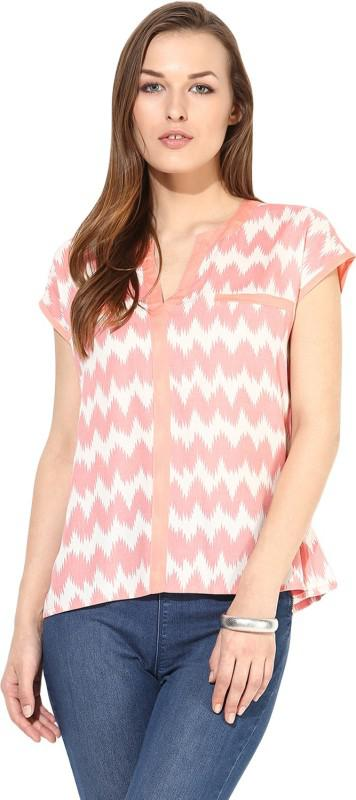

Title : Citrine Casual Short Sleeve Printed Women's Pink, White Top
Eucliden distance from the given image : 0.0
productId : TOPE9ABBBTJYDSQE


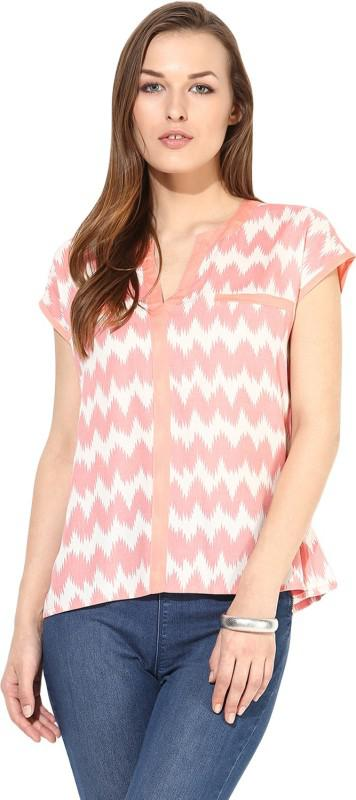

Title : Citrine Casual Short Sleeve Printed Women's Pink, White Top
Eucliden distance from the given image : 0.0
productId : TOPE9ABBPDAN7VCH


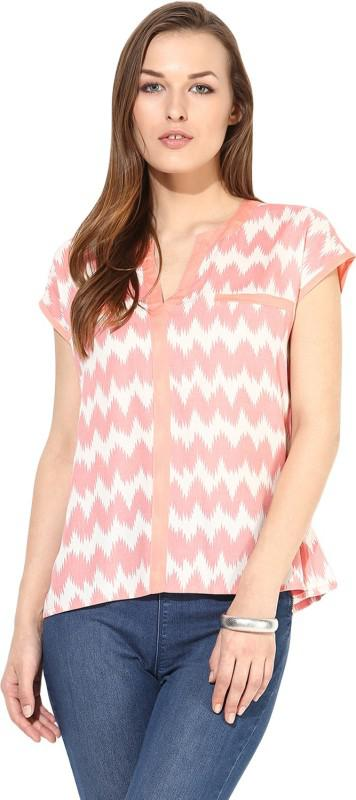

Title : Kaaryah Formal Short Sleeve Solid Women's Black Top
Eucliden distance from the given image : 0.0
productId : TOPE9ABBHJ8HGGGK


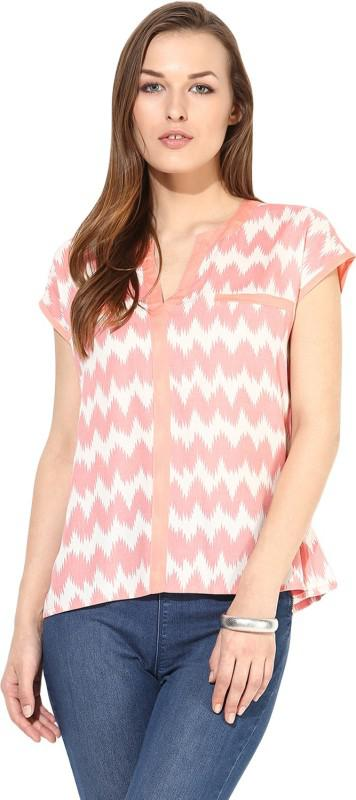

Title : Ladybond Casual Cap Sleeve Graphic Print Women's Multicolor Top
Eucliden distance from the given image : 0.0
productId : TOPEG3YSHAUANXH3


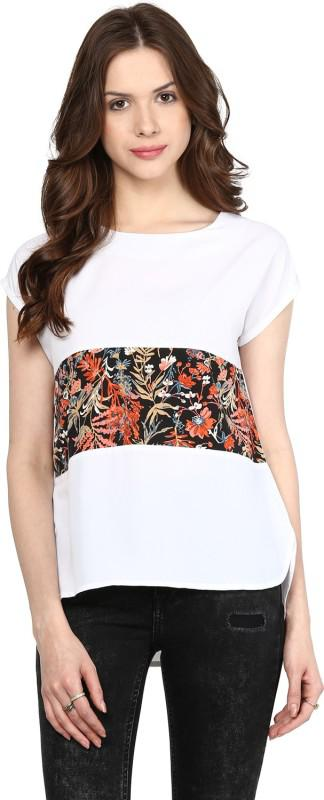

Title : Uptown 18 Casual Short Sleeve Printed Women's Yellow Top
Eucliden distance from the given image : 0.370414166754521
productId : TOPEG3YSTHDHAYXT


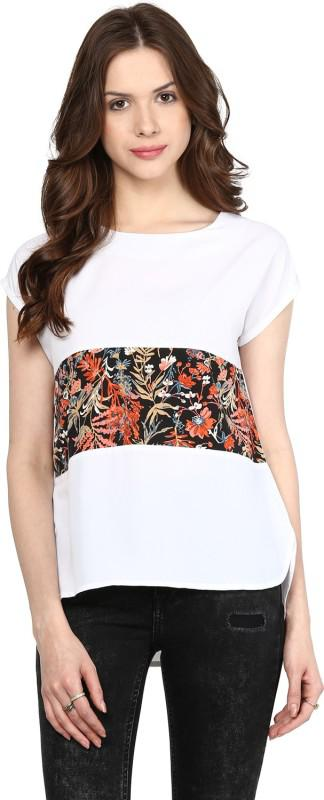

Title : Good Fashion Casual 3/4th Sleeve Printed Women's Light Blue Top
Eucliden distance from the given image : 0.370414166754521
productId : TOPEG3YSE6GJ8GBN


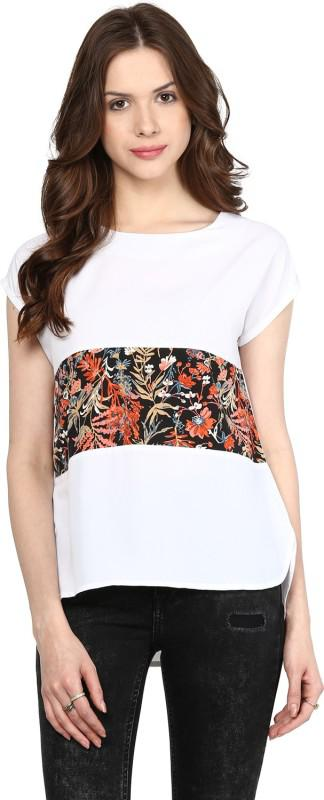

Title : Good Fashion Casual Sleeveless Printed Women's Blue, White Top
Eucliden distance from the given image : 0.370414166754521
productId : TOPE7CFTCDFRDM2W


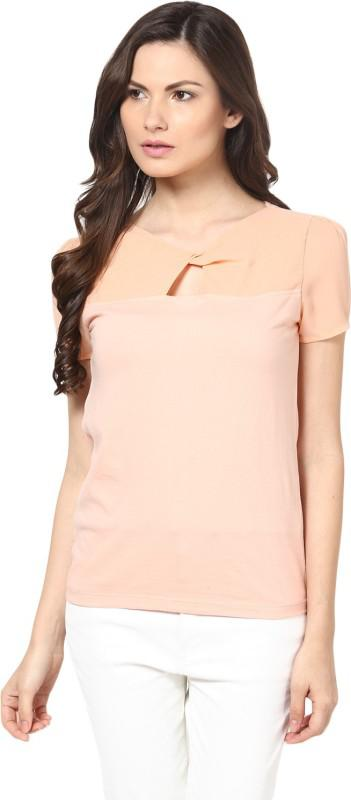

Title : Kaaryah Casual 3/4th Sleeve Printed Women's Black Top
Eucliden distance from the given image : 0.44242601645610063
productId : TOPEBPZ5BPW4HPJ9


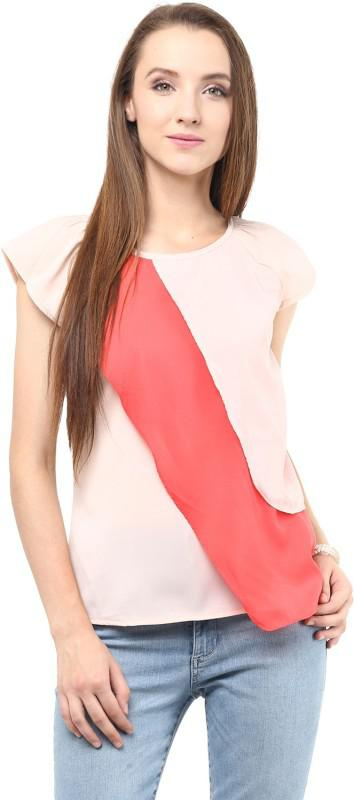

Title : Chemistry Casual Women's Top
Eucliden distance from the given image : 0.44242601645610063
productId : TOPE7CFTAZH4NGRP


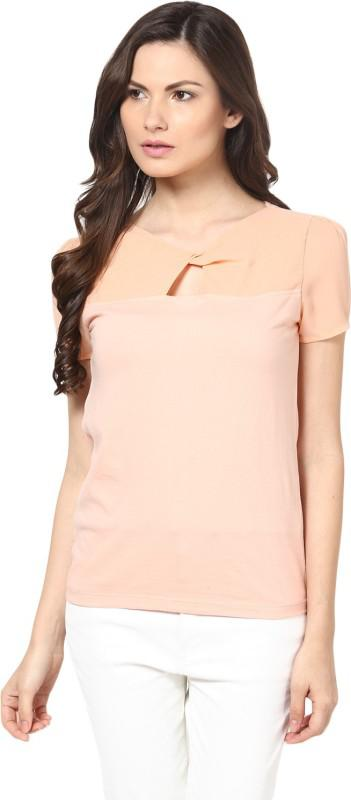

Title : Kaaryah Casual 3/4th Sleeve Printed Women's Black Top
Eucliden distance from the given image : 0.44242601645610063


In [0]:
tfidf_model(1, 10)